# Un análisis crítico de los Notebooks como recurso docente interactivo en economía y finanzas

**Francisco Salas Molina y Marisa Vercher-Ferrandiz**  

Universitat Politècnica de Valencia, Campus Alcoy    

frasamo@upv.es    maverfer@upv.es

# 1. Objetivo y contexto

<font size="4">
    
- El **objetivo principal** de esta presentación es la realización de un **análisis crítico** sobre la utilización de los Notebooks como recurso docente.  

    
- Un **Notebook** es una herramienta interactiva que permite realizar cálculos y mucho más.  


- El **contexto** de análisis será la enseñanza superior (Grado y Máster) en el campo de la economía y las finanzas.

<font>


# 2. ¿Cuál es el plan?

<font size="4">

1. Breve introducción las **características** principales de los Notebooks  

    
2. Revisión de **experiencias** de su uso en el ámbito universitario  


3. Análisis crítico de las **ventajas** y los **inconvenientes** en el ámbito de la economía y las finanzas.  

************

<font>

# 3. Principales características de los Notebooks

<font size="4">
    
- Un Noteobook es una **herramienta interactiva** que se ejecuta sobre un navegador web como Chrome que permite realizar cálculos complejos mediante instrucciones de programación, representar gráficas, añadir vídeos o texto con formato enriquecido, visualizar fórmulas, etc.  
    
    
    
- ¿Y qué entendemos por interactiva? Básicamente, que **si se le pregunta la herramienta contesta**. Más formalmente, que si se le pide hacer algo con las instrucciones adecuadas, la herramienta es capaz de realizar una serie de tareas como hacer cálculos o visualizar gráficos en tiempo real.  



- Los Notebooks están estructurados en celdas que se pueden **modificar** y **ejecutar** cuantas veces sean necesarias. 


- En el caso de que las instrucciones sean que se realice un cálculo, el **resultado** se muestra debajo de cada celda al pulsar Shift+Enter simultáneamente. Si se produce un error, también se muestra.

<font>

In [4]:
1+1

2

In [5]:
print ("Hola mundo")

Hola mundo


In [6]:
1/0

ZeroDivisionError: division by zero

In [7]:
print "Hola mundo"

SyntaxError: Missing parentheses in call to 'print'. Did you mean print("Hola mundo")? (<ipython-input-7-f449a8d835d7>, line 1)

# Tipos de celdas

<font size="4">  
    
1. Código: son las celdas por defecto y se utilizan para insertar código ejecutable en un lenguaje de programación. En este caso Python. Las 4 celdas anteriores son ejemplos de celdas de código.
    

2. Markdown: se utilizan para instertar texto con formato que se puede utilizar para añadir explicaciones, para insertar fórmulas, enlaces a páginas web, imagenes, vídeos...  Esta misma celdas es un ejemplo de celdas de texto

<font>

<font size="4"> 
    
Las celdas tipo Markdown permiten añadir enlaces...

https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-text-files/format-text-with-markdown-jupyter-notebook/

Las celdas de tipo Markdown también permiten introducir **fórmulas** utilizando las convenciones sobre símbolos habituales de **Latex** (procesador de textos de alta calidad tipográfica para artículos científicos).  


Por ejemplo, podemos si queremos escribir la fórmula del Valor Actual Neto (VAN) de una serie de flujos futuros descontados a la tasa $r$, escribiríamos...


$VAN = \sum_{t=1}^n \frac{F_t}{(1+r)^t}$

***********

<font>

# Librerías  

<font size="4">  
    
Muchas de las funcionalidades útiles están almacenadas en librerías que hay que importar para que pueden ser utilizadas en el Notebook


1. **Numpy**: contiene las funciones básicas de cálculo y análisis de datos alamcenados en vecotres y matrices.
    

2. **Pandas**: dispone de estructuras para trabajar con datos indexados en formato tabular. Permite trabajar con fechas, importar y exportar datos a hojas de cálculo y hacer análisis estadísticos.


3. **Matplotlib**: es una librería de visualización de datos mediante gráficos.

<font>

In [8]:
# Instrucciones para cargar las librerías más utilizadas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Para que las gráficas se presenten como resultado de la ejecución de las celdas 
# y no como una ventana diferente
%matplotlib inline  

# Ejemplo de instrucciones para hacer una simulación de la rentabilidad y el retorno de una cartera de cinco activos

In [9]:
# Un ejemplo de importación de datos de una hoja excel

data = pd.read_excel("ibex.xlsx")
data.index = data['Date']

In [10]:
import random as rnd

# Cálculo de los retornos medios y la matriz de covarianzas 
rets = data[data.columns[0:-1]]
covs = data[data.columns[0:-1]].cov()

# Selección de cinco activos
noa = 5
assets = rnd.sample(list(rets.columns),noa)

In [11]:
# Simulación a partir de un bucle que repite cálculos de rentabilidad y riesgo 250 veces

prets = []
pvols = []
for p in range (250):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(np.sum(rets[assets].mean() * weights)*50) #50 weeks to obtain annualized returns
    pvols.append(np.sqrt(np.dot(weights.T,np.dot(rets[assets].cov() * 50, weights))))
prets = np.array(prets)
pvols = np.array(pvols)

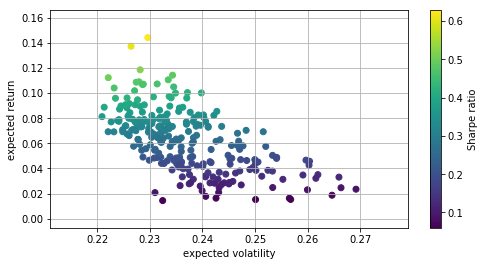

In [12]:
# Representación gráfica utilizando Matplotlib y guardamos la gráfica

plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets, c=prets / pvols, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.savefig('PortfolioSelection.pdf')

# 4. Algunas experiencias

<font size="4">  

**4.1. Proyecto QuantEcon**

Sargent, T., & Stachurski, J. (2010). Quantitative economics. http://quant-econ.net 

<font>  

https://es.wikipedia.org/wiki/Thomas_J._Sargent


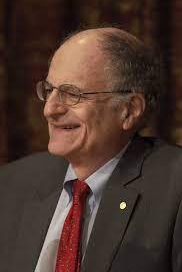

In [13]:
from IPython.display import Image
print("https://es.wikipedia.org/wiki/Thomas_J._Sargent")
Image(filename="TomSargent.jpg", width=300, height=300)

<font size="4">  

QuantEcon es una organización sin ánimo de lucro liderada por Tom Sargent y John Stachurski que tiene como objetivo la mejora de la modelización económica a través de herramientas computacionales.  

Se trata de un conjunto de lecciones y recursos docentes basados en Python, R y Julia que facilitan el desarrollo de código abierto para la modelización económica. 

**Lecciones**


1. Programación en Python para economía y finanzas (19 lecciones).  
2. Economía cuantitativa con Python (77 lecciones).  
3. Economía cuantitativa avanzada con Python (50 lecciones).  

Además de los contenidos teóricos de las lecciones y todo el código en Python, también hay disponible una colección de Notebooks donde se desarrollan conceptos específicos.  

**Público objetivo**: Nivel muy amplio desde los elementos básicos de Python a temas avanzados.

****************
<font>  

<font size="4">  

**4.2. Curso de métodos numéricos para economistas**  

de David Pugh (King Abdullah University of Science and Technology)

*Pugh, D. R. (2014). Python for research and teaching economics. In Proceedings of the 13th Python in Science Conference*

http://www.youtube.com/watch?v=xHkGW1l5X8k



Curso abierto (disponible en GitHub https://github.com/davidrpugh/numerical-methods) sobre métodos numéricos para economistas
diseñado para aumentar la utilización de técnicas computacionales en el ámbito de la docencia y la investigación.

**Prácticas de laboratorio de informática**


1. Modelo de crecimiento de Solow.
2. Modelo de ahorro óptimo de Ramsey-Cass-Koopmans.
3. Programación dinámica. 
4. Modelos de ciclo económico real.

Está basado en Notebooks y el autor indica que no es necesario ningún conocimiento previo de programación pero prácticamente no hay ningún recurso básico introductorio a los notebooks de Python.


En el artículo publicado (http://conference.scipy.org/proceedings/scipy2014/pdfs/pugh.pdf) sí que se da una referencia a recursos introductorios a Python.

****************

<font size="4">  


<font size="4">  

**4.3. Microeconomía con Python**  

de Masanori Kuroki (Arkansas Tech University)

*Kuroki, M. (2021). Using Python and Google Colab to teach undergraduate microeconomic theory. International Review of Economics Education, 38, 100225*


Artículo donde se describe cómo utilizar Python para un curso de Microeconomía a nivel universitario (undergraduate) donde se utilizan principalmente técnicas de **optimización** y se recomienda el uso de la liberería **SymPy** para la manipulación simbólica de ecuaciones, derivadas, etc.. 

Se apunta como solución a los problemas de instalación de la aplicación el uso de Google Colaboratory (https://colab.research.google.com/?hl=es) que es una plataforma gratuita que permite trabajar con Notebooks directamente en un navegador web.  

**Tutorial**

1. Maximización de utilidad 
2. Equilibrio general con dos bienes y dos consumidores 
3. Minimización de coste
4. Mercados competitivo
5. Monopolio
6. Discriminación de precios
7. Modelo de Cournot
8. Modelo de Stackelberg
9. Modelo de Bertrand. 

Además del tutorial, lo interesante de este artículo es que se apuntan aspectos por los cuales los docentes y los estudiantes deben usar y aprender Python y los notebooks de Python.  Por un lado, los profesores aportan una nueva herramienta de código abierto **complementar el enfoque tradicional** de lapiz y papel. Por oro lado, los alumnos con habilidades de programación encontrarán trabajo antes que aquellos que no los tienen porque muchas **ofertas de empleo valoran cada vez más este tipo de habilidades**.

*********



<font size="4">  

**4.4. Gestión de tesorería con Python**  

de Salas-Molina y Pla-Santamaría (Universitat Politècnica de Valencia)  

*Salas Molina, F., & Pla Santamaría, D. (2018). Coding oriented learning in economics, business and finance. Modelling in Science Education and Learning, 11(1), 55-64.*

Los autores indican las lecciones aprendidas durante una experiencia docente de gestión de tesorería dentro de una asignatura de Técnicas Avanzadas de Dirección Financiera a nivel de Master en Dirección de Empresas.

1. Problemas de **instalación** del software. Google Colaboratory es una buena solución.  

2. Aprender conceptos nuevos con una nueva herramienta es un **reto doble**. Mejor utilizar conceptos conocidos o dedicar una clase tradicional a conocer el concepto antes de implementarlo en un Notebook.  





************

<font >

# 5. Análisis crítico

<font size="4">  

**Ventajas** (de lo general a lo particular)  


1. Un Noteobook es una **herramienta interactiva** que permite integrar conceptos teóricos con aspectos prácticos (cálculos, optimización, gráficos, etc).  


2. Es un recurso docente gratuito basado en Python que es un lenguaje de programación de código abierto.  


3. Siguiendo a Sargent (https://python-programming.quantecon.org/about_py.html), es una herramienta fácil de aprender y que está sustituyendo a Excel en ámbitos económicos y financieros (también destacado por Muroki (2021)).  


4. Siguiendo a Muroki, desarrollar habilidades de programación puede facilitar la obtención del primer empleo y el desarrollo profesional.  


5. La ejecución secuencial de los Notebooks permite estructurar el aprendizaje (No ejecutar el paso 2 hasta que no se ha ejecutado el paso 1).
   

<font>  

<font size="4">  
    
**Desventajas** (de lo general a lo particular)  

1. Problemas de instalación si no se opta por la opción web Google Colaboratory.  


2. Curva de aprendizaje dilatada para estudiantes con bajas habilidades tecnológicos.  


3. Tiempo dedicado a gestionar mensajes de error. Los lenguajes de programación son rígidos en el sentido de que las instrucciones deben introducirse correctamente. De lo contrario, se muestran mensajes de error (en ocasiones crípticos) que hay que resolver para continuar.  


4. La ejecución secuencial de los Notebooks puede provovar problemas si las celdas no se ejecutan en el orden establecido.  

**************

<font>  

# 6. Conclusión

<font size="4">  


Aunque el uso de **herramientas computacionales** como los Notebooks está mucho más extendido en estudios tecnológicos como los grados de matemáticas, física o ingenierías, su **progresiva integración** en las ciencias económicas no solo representa una **innovación** sino también puede mejorar la **empleabilidad** de los futuros graduados.

**¿Qué se puede hacer?** 

1. Contribuir al debate sobre la idoneidad de este tipo de herramientas en el ámbito de la economía y las finanzas.  



2. Reportar experiencias sobre su utilización.  



3. Continuar trabajando para mejorar la formación de los futuros graduados mediante el desarrollo de habilidades digitales.  

***********



 Enlace a este Notebook en GitHub:  
 
 https://github.com/PacoSalas?tab=repositories

# Bibliografía

- Kuroki, M. (2021). Using Python and Google Colab to teach undergraduate microeconomic theory. International Review of Economics Education, 38, 100225.

- Pugh, D. R. (2014). Python for research and teaching economics. In Proceedings of the 13th Python in Science Conference.

- Salas Molina, F., & Pla Santamaría, D. (2018). Coding oriented learning in economics, business and finance. Modelling in Science Education and Learning, 11(1), 55-64.

- Sargent, T., & Stachurski, J. (2014). Quantitative economics. http://quant-econ.net 